In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.shape

(42000, 785)

In [4]:
test_data  = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submission_df = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
test_data.shape, submission_df.shape

((28000, 784), (28000, 2))

In [5]:
data.isna().sum().sum()

0

In [6]:
x = np.array(data.drop('label', axis =1))
y = np.array(data['label'])

In [7]:
# creating seprate datasets for training and validation will be using original x and y for making the final predection
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1)
x_train.shape, y_val.shape

((37800, 784), (4200,))

Text(0.5, 1.0, '9')

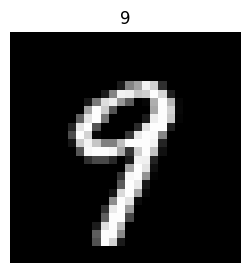

In [8]:
image = np.random.randint(len(x))
plt.figure(figsize= (3,3))
plt.imshow(x_train[image].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f'{y_train[image]}')

## Using ML models
Using non-linear models like Random Forest and XGBoost for the task of classification.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = len(x_train), max_depth = 12).fit(x_train, y_train)

rf_train_pred = rf_model.predict(x_train)
rf_val_pred = rf_model.predict(x_val)

print(accuracy_score(y_train, rf_train_pred)*100)
print(accuracy_score(y_val, rf_val_pred)*100)

99.06613756613757
95.38095238095238


In [11]:
xgb_model = XGBClassifier(
    n_estimators = 100, 
    random_state = len(x_train),
    use_label_encoder=False
).fit(x_train, y_train)

xgb_train_pred = xgb_model.predict(x_train)
xgb_val_pred = xgb_model.predict(x_val)

print(accuracy_score(y_train, xgb_train_pred)*100)
print(accuracy_score(y_val, xgb_val_pred)*100)

100.0
97.57142857142857


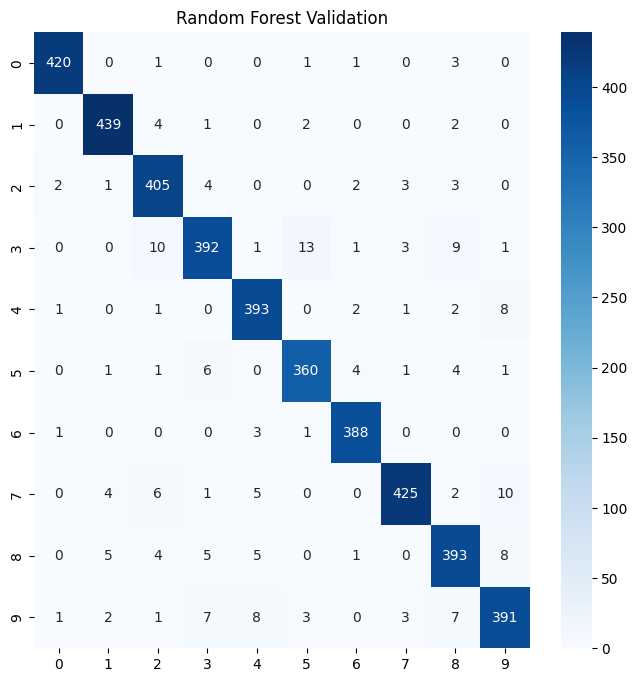

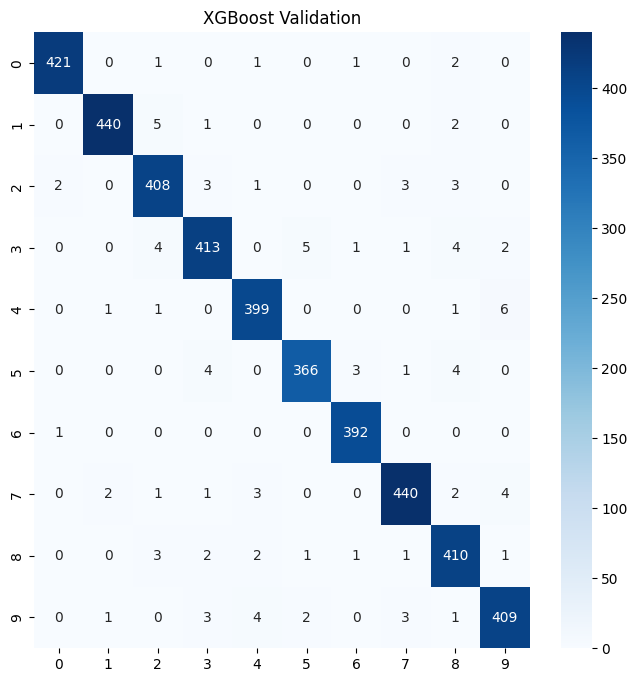

In [12]:
def plot_confusion_matrix(y_actual, y_pred, title):
    plt.figure(figsize = (8,8))
    cm = confusion_matrix(y_actual, y_pred)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
    
plot_confusion_matrix(y_val, rf_val_pred, 'Random Forest Validation')
plot_confusion_matrix(y_val, xgb_val_pred, 'XGBoost Validation')

We are getting pretty good accuracy for the XGB model so we are making our first prediction thorugh it

In [13]:
%%time
xgb_model.fit(x, y)

CPU times: user 16min 37s, sys: 1.01 s, total: 16min 38s
Wall time: 4min 14s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [14]:
submission_df.columns

Index(['ImageId', 'Label'], dtype='object')

In [15]:
def make_submission(model):
    pred = model.predict(test_data)
    submission_df['Label'] = pred
    submission_df.to_csv('Submission.csv', index = False)

In [16]:
make_submission(xgb_model)

In [17]:
submission_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
